# Lecture 3

# Markdown Basics for Jupyter Notebooks

## Text Formatting
- **Bold text**: `**bold**` or `__bold__`
- *Italic text*: `*italic*` or `_italic_`
- ***Bold and italic***: `***text***`
- ~~Strikethrough~~: `~~text~~`
- `Inline code`: `` `code` ``

## Headers
# Header 1: `# Header 1`
## Header 2: `## Header 2`
### Header 3: `### Header 3`
#### Header 4: `#### Header 4`

## Lists
**Unordered:**
- Item 1: `- Item 1`
- Item 2: `* Item 2`
  - Nested: `  - Nested`

**Ordered:**
1. First: `1. First`
2. Second: `2. Second`
   1. Nested: `   1. Nested`

## Links and Images
- [Link text](https://example.com): `[Link text](url)`
- ![Alt text](image.png): `![Alt text](image_url)`

## Code Blocks
```python
# Use triple backticks for code blocks
import pandas as pd
df = pd.read_csv('data.csv')
```

## Inline Math
You can type math using $...$ and it will accept any latex commands e.g. $\alpha$

## Horizontal line

Three or more dashes creates a horizontal line
--- 


# Markdown Basics for Jupyter Notebooks

## Text Formatting
- **Bold text**: `**bold**` or `__bold__`
- *Italic text*: `*italic*` or `_italic_`
- ***Bold and italic***: `***text***`
- ~~Strikethrough~~: `~~text~~`
- `Inline code`: `` `code` ``

## Headers
# Header 1: `# Header 1`
## Header 2: `## Header 2`
### Header 3: `### Header 3`
#### Header 4: `#### Header 4`

## Lists
**Unordered:**
- Item 1: `- Item 1`
- Item 2: `* Item 2`
  - Nested: `  - Nested`

**Ordered:**
1. First: `1. First`
2. Second: `2. Second`
   1. Nested: `   1. Nested`

## Links and Images
- [Link text](https://example.com): `[Link text](url)`
- ![Alt text](image.png): `![Alt text](image_url)`

## Code Blocks
```python
# Use triple backticks for code blocks
import pandas as pd
df = pd.read_csv('data.csv')

## Handling Categorical Data

In [97]:
# read in data frame
import pandas as pd 
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

movies = pd.read_csv('../datasets/movies_dataset.csv')

In [98]:
movies.columns

Index(['movie_title', 'original_title', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'budget', 'gross', 'title_year',
       'release_date', 'duration', 'vote_average', 'vote_count', 'popularity',
       'genres', 'country', 'original_language', 'overview', 'tagline',
       'tmdb_id', 'imdb_id'],
      dtype='object')

In [99]:
movies['genres'].value_counts()

genres
Drama                               245
Comedy                              162
Documentary                         111
Comedy|Drama                         84
Horror                               61
                                   ... 
Drama|Comedy|Fantasy                  1
Crime|Mystery|Thriller|Action         1
Drama|Fantasy|Horror                  1
Action|Comedy|Mystery                 1
Animation|Family|Fantasy|History      1
Name: count, Length: 907, dtype: int64

In [100]:
# Convert to category pandas type 

movies['genres'] = movies['genres'].astype('category')
movies['genres'].dtype

CategoricalDtype(categories=['Action', 'Action|Adventure',
                  'Action|Adventure|Animation|Comedy|Family',
                  'Action|Adventure|Animation|Family',
                  'Action|Adventure|Comedy', 'Action|Adventure|Comedy|Crime',
                  'Action|Adventure|Comedy|Documentary|Horror|Thriller|Science Fiction',
                  'Action|Adventure|Comedy|Drama|Crime',
                  'Action|Adventure|Comedy|Family|Fantasy|History',
                  'Action|Adventure|Comedy|Family|Science Fiction',
                  ...
                  'Western', 'Western|Action|Drama', 'Western|Crime|Drama',
                  'Western|Crime|Thriller', 'Western|Drama',
                  'Western|Drama|Action', 'Western|Drama|Adventure',
                  'Western|Drama|Comedy', 'Western|Drama|Comedy|Crime|Family',
                  'Western|Horror|Drama'],
, ordered=False, categories_dtype=object)

In [101]:
# Clean Genre Category
# Extract the first genre before the first pipe character
movies['genre_first'] = movies['genres'].str.split('|', expand=True)[0]

# If you want it as a categorical type
movies['genre_first'] = movies['genre_first'].astype('category')

# Check the result
movies['genre_first'].value_counts()

genre_first
Drama              677
Comedy             493
Action             386
Horror             262
Documentary        173
Thriller           133
Animation          112
Adventure          108
Romance             98
Crime               92
Science Fiction     74
Family              72
Mystery             50
Fantasy             44
War                 33
History             30
Music               29
Western             15
TV Movie             4
Name: count, dtype: int64

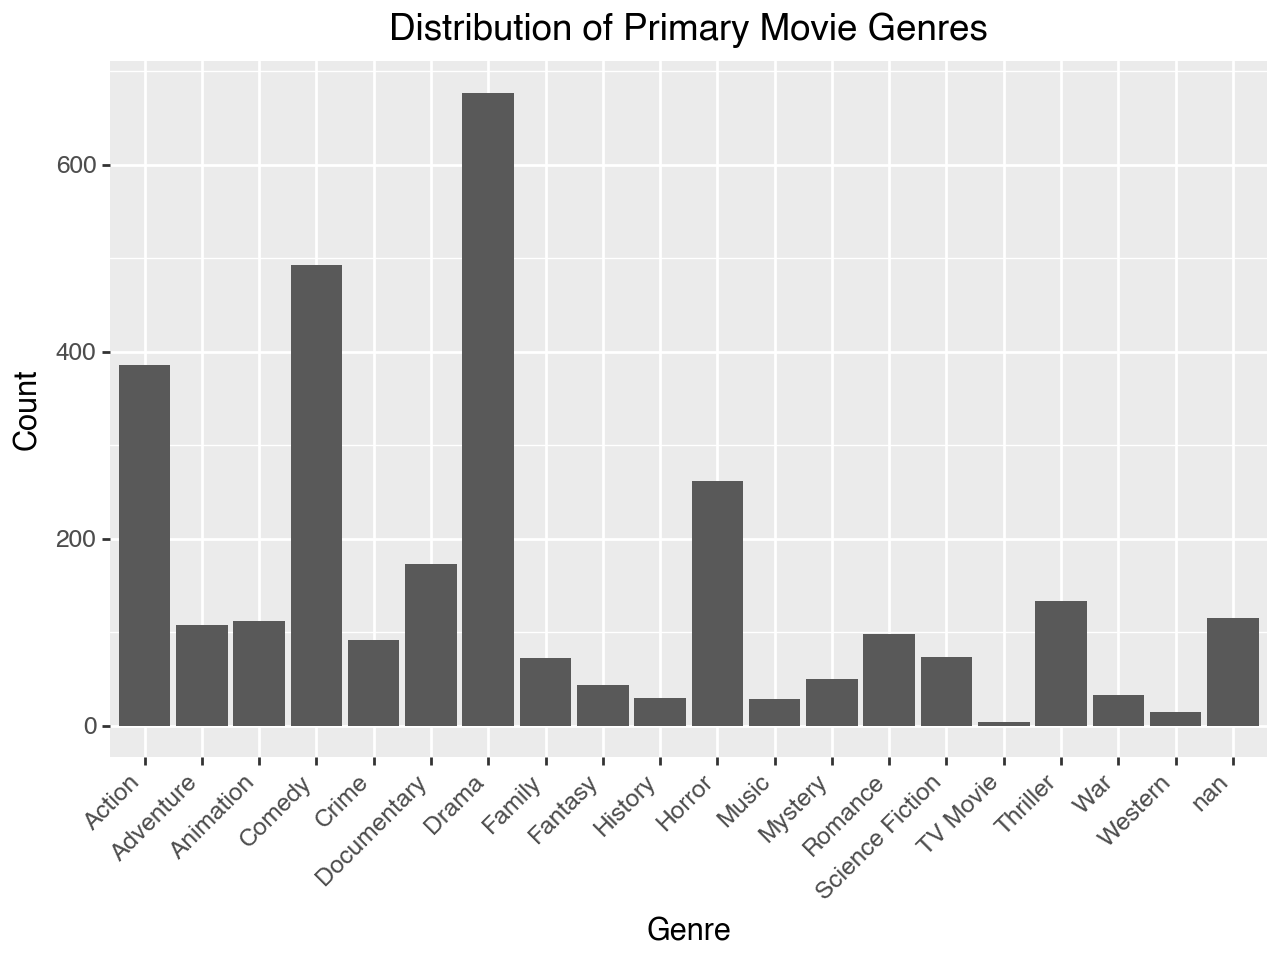

In [102]:
from plotnine import *
import pandas as pd

# Order genres by frequency for better visualization
genre_counts = movies['genre_first'].value_counts()
movies['genre_first_ordered'] = pd.Categorical(
    movies['genre_first'], 
    categories=genre_counts.index,
    ordered=True
)

# Create the plot using plotnine - FIXED VERSION
(
    ggplot(movies, aes(x='genre_first_ordered')) +
    geom_bar() +
    theme(axis_text_x=element_text(rotation=45, ha='right')) +
    labs(title='Distribution of Primary Movie Genres',
         x='Genre',
         y='Count')
)

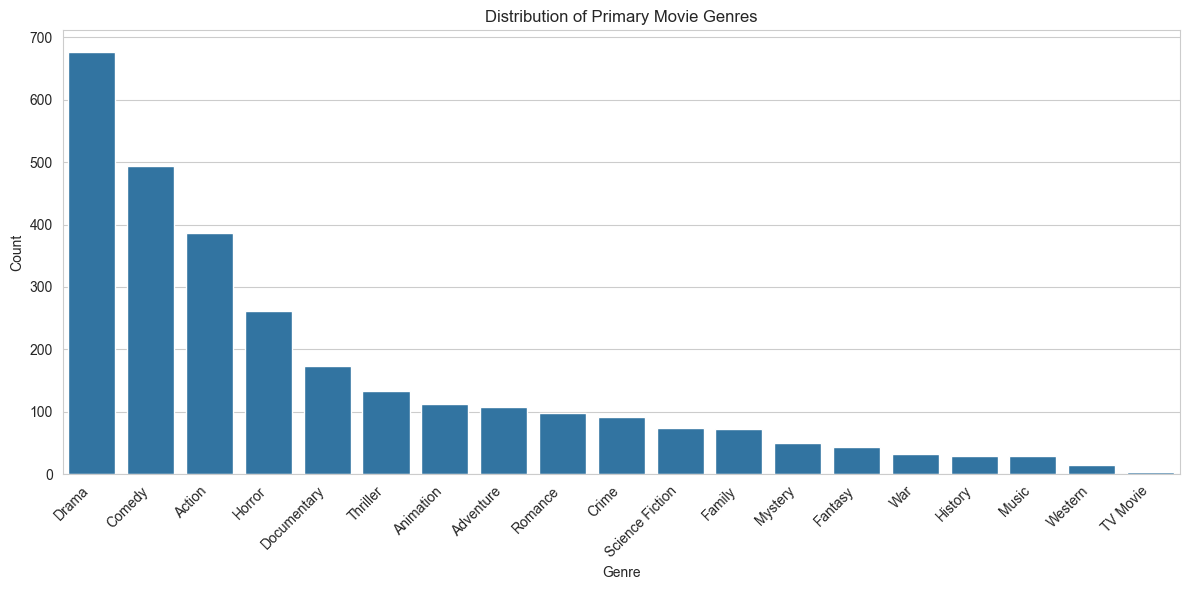

In [103]:
# using another common plotting package seaborn
import matplotlib.pyplot as plot
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")

# Create histogram with Seaborn
plot.figure(figsize=(12, 6))
sns.countplot(data=movies, x='genre_first', order=movies['genre_first'].value_counts().index)
plot.xticks(rotation=45, ha='right')
plot.title('Distribution of Primary Movie Genres')
plot.xlabel('Genre')
plot.ylabel('Count')
plot.tight_layout()
plot.show()

## Handling Categorical Levels

In [104]:
# Recording factor levels
movies['genre_first_simple'] = movies['genre_first'].replace({
    'TV Movie': 'Other',
    'Western': 'Other', 
    'Music': 'Other',
    'History': 'Other',
    'War': 'Other',
    'Fantasy': 'Other'
})

movies['genre_first_simple'].value_counts()

genre_first_simple
Drama              677
Comedy             493
Action             386
Horror             262
Documentary        173
Other              155
Thriller           133
Animation          112
Adventure          108
Romance             98
Crime               92
Science Fiction     74
Family              72
Mystery             50
Name: count, dtype: int64

In [105]:
import numpy as np

rare_genres = ['TV Movie', 'Western', 'Music', 'History', 'War', 'Fantasy']
movies['genre_first_simple'] = np.where(
    movies['genre_first'].isin(rare_genres),
    'Other',
    movies['genre_first']
)
movies['genre_first_simple'].value_counts()

genre_first_simple
Drama              677
Comedy             493
Action             386
Horror             262
Documentary        173
Other              155
Thriller           133
Animation          112
Adventure          108
Romance             98
Crime               92
Science Fiction     74
Family              72
Mystery             50
Name: count, dtype: int64

In [106]:
# Get counts for each genre
genre_counts = movies['genre_first'].value_counts()

# Identify genres with less than 50 movies
rare_genres = genre_counts[genre_counts < 100].index.tolist()

# Replace rare genres with 'Other'
movies['genre_first_simple'] = movies['genre_first'].replace(
    {genre: 'Other' for genre in rare_genres}
)
movies['genre_first_simple'].value_counts()

genre_first_simple
Drama          677
Other          541
Comedy         493
Action         386
Horror         262
Documentary    173
Thriller       133
Animation      112
Adventure      108
Name: count, dtype: int64

In [107]:
movies.columns

Index(['movie_title', 'original_title', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'budget', 'gross', 'title_year',
       'release_date', 'duration', 'vote_average', 'vote_count', 'popularity',
       'genres', 'country', 'original_language', 'overview', 'tagline',
       'tmdb_id', 'imdb_id', 'genre_first', 'genre_first_ordered',
       'genre_first_simple'],
      dtype='object')

___
## Lab 1 Working with Categorical Variables


1. Identify which columns in the movies dataset would benefit from 
    being converted to categorical type. Check their current dtypes 
    and memory usage with .info()

In [108]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movie_title          3000 non-null   object  
 1   original_title       3000 non-null   object  
 2   director_name        2901 non-null   object  
 3   actor_1_name         2902 non-null   object  
 4   actor_2_name         2772 non-null   object  
 5   actor_3_name         2614 non-null   object  
 6   budget               3000 non-null   int64   
 7   gross                3000 non-null   int64   
 8   title_year           3000 non-null   int64   
 9   release_date         3000 non-null   object  
 10  duration             3000 non-null   int64   
 11  vote_average         3000 non-null   float64 
 12  vote_count           3000 non-null   int64   
 13  popularity           3000 non-null   float64 
 14  genres               2885 non-null   category
 15  country              

In [109]:
# Identify columns with object dtype and relatively few unique values
potential_categorical = []
for col in movies.columns:
    if movies[col].dtype == 'object':
        unique_count = movies[col].nunique(dropna=True)
        if unique_count < 75:  
            potential_categorical.append((col, unique_count))

print("Columns suitable for categorical conversion (with unique counts):")
for col, count in potential_categorical:
    print(f"{col}: {count}")

Columns suitable for categorical conversion (with unique counts):
original_language: 66


2. Create a frequency table for the 'original_language' column 
    using .value_counts(). What are the top 5 languages?

In [110]:
movies['original_language'].value_counts()

original_language
en    1738
es     160
fr     150
hi     107
pt     104
      ... 
ku       1
sq       1
gu       1
ff       1
dv       1
Name: count, Length: 66, dtype: int64

3. Convert 'country' to categorical type using .astype('category'). 
   Compare memory usage before and after conversion using .memory_usage()

In [111]:
movies['country'] = pd.Categorical(movies['country'])
movies['country'].dtype

CategoricalDtype(categories=['Albania|Spain', 'Andorra|Spain', 'Argentina',
                  'Argentina|Colombia', 'Argentina|France', 'Argentina|Spain',
                  'Argentina|United States of America', 'Argentina|Venezuela',
                  'Australia', 'Australia|Canada',
                  ...
                  'United States of America|Netherlands',
                  'United States of America|South Africa',
                  'United States of America|Spain',
                  'United States of America|Sweden',
                  'United States of America|Switzerland',
                  'United States of America|Tunisia',
                  'United States of America|United Kingdom', 'Uruguay',
                  'Venezuela', 'Vietnam'],
, ordered=False, categories_dtype=object)

4. For the 'director_name' column, create a new column 'director_simple' that keeps only directors with 5+ movies, labeling all others as 'Other'. Hint: Use value_counts() and replace() or np.where()

In [112]:
# Find directors with 5 or more movies
director_counts = movies['director_name'].value_counts()
major_directors = director_counts[director_counts >= 5].index

# Create 'director_simple' column
movies['director_simple'] = np.where(
    movies['director_name'].isin(major_directors),
    movies['director_name'],
    'Other'
)

# Show counts for the new column
movies['director_simple'].value_counts()

director_simple
Other                    2915
Yen Ah Moi                 10
Bruno Ferreira             10
Matthew Cavanaugh           8
Seamus Gibney               6
Steven Spielberg            6
Denis Villeneuve            5
Guy Ritchie                 5
Luca Guadagnino             5
M. Night Shyamalan          5
Phạm Trung Kiên             5
Gianluca Leuzzi             5
Woody Allen                 5
Johannes Roberts            5
Cleber Fernando Gomes       5
Name: count, dtype: int64

5. Create a horizontal bar plot showing the top 10 countries by movie count using matplotlib or seaborn. 

In [113]:
top_10_countries = movies['country'].value_counts().head(10).index.tolist()
print(top_10_countries)

['United States of America', 'India', 'United Kingdom|United States of America', 'United Kingdom', 'Brazil', 'France', 'Russia', 'Iran', 'Belgium|France', 'Canada|United States of America']


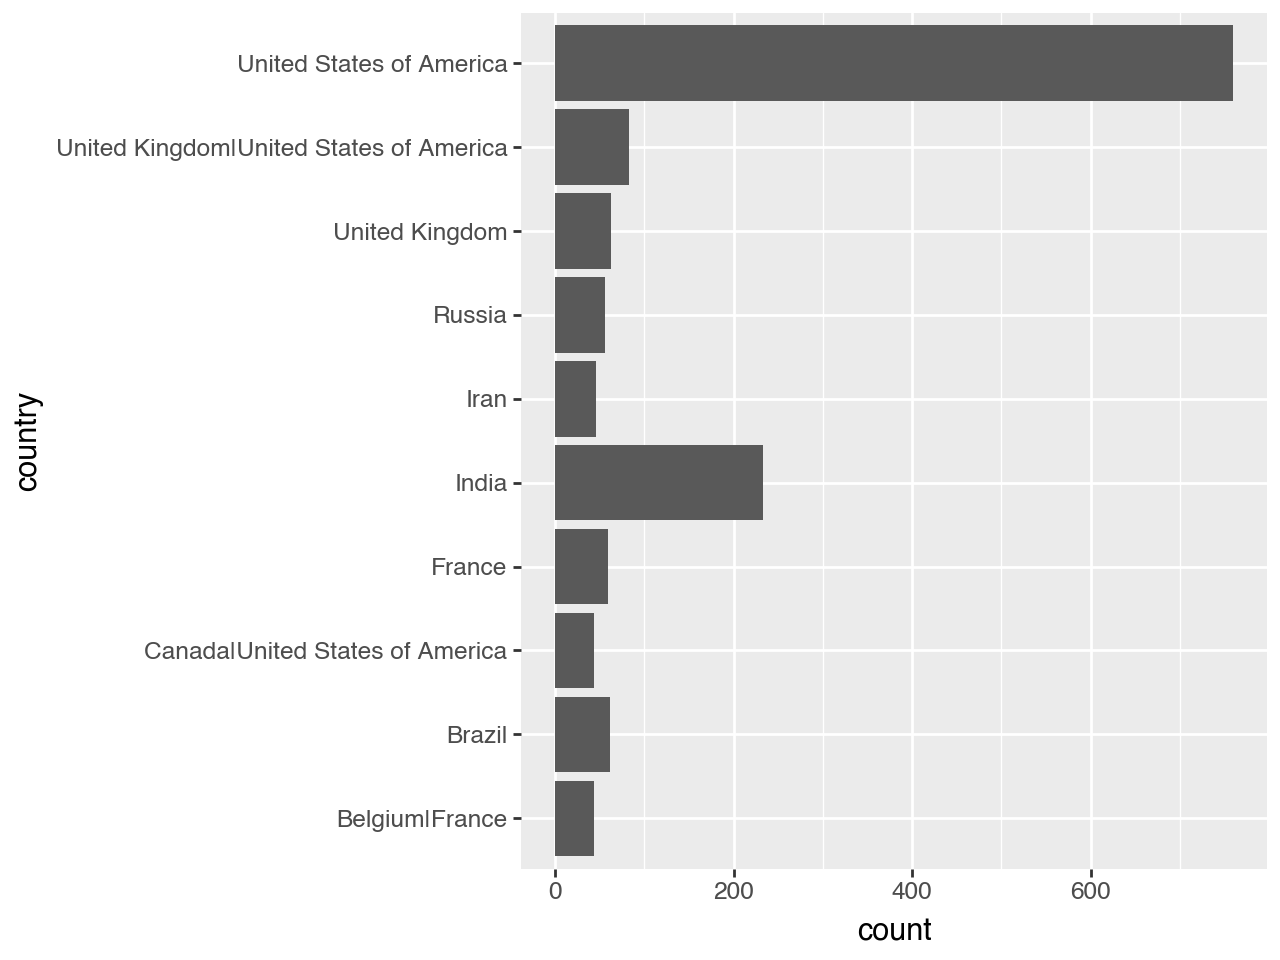

In [114]:
from plotnine import *

plt = ggplot(movies[movies['country'].isin(top_10_countries)], aes(x='country')) + geom_bar()+ coord_flip()
plt.show()


# Group By to Create Summary Tables

In [115]:
# Example with hypothetical income data
import pandas as pd

# Assuming we have individual-level data
individuals = pd.DataFrame({
    'country': ['USA', 'USA', 'Norway', 'Norway', 'Australia'],
    'income': [55000, 35960, 22000, 16616, 18000],
    'person_id': [1, 2, 3, 4, 5]
})

# Group by country and calculate statistics
country_stats = individuals.groupby('country').agg(
    median_income=('income', 'median'),
    population=('person_id', 'count')
).reset_index()

print(country_stats)

     country  median_income  population
0  Australia        18000.0           1
1     Norway        19308.0           2
2        USA        45480.0           2


In [116]:
# Group by language and calculate multiple statistics
language_stats = movies.groupby('original_language').agg(
    movie_count=('movie_title', 'count'),
    median_gross=('gross', 'median'),
    avg_budget=('budget', 'mean'),
    avg_rating=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()
language_stats.sort_values('movie_count', ascending=False)

,original_language,movie_count,median_gross,avg_budget,avg_rating,total_votes
12,en,1738,3671601.0,2.968881e+07,5.410698,3530980
13,es,160,1000.0,1.965244e+06,4.542950,27048
19,fr,150,2112158.0,8.933468e+06,6.144920,67010
22,hi,107,12500000.0,1.137207e+07,6.217308,12562
48,pt,104,200.0,5.209038e+05,4.742144,3399
...,...,...,...,...,...,...
9,dv,1,35000.0,3.250000e+04,6.000000,1
17,ff,1,164602.0,1.750000e+06,6.600000,23
10,dz,1,120000.0,1.460000e+05,7.667000,6
15,eu,1,1036926.0,4.300000e+06,6.599000,96


In [117]:
import plotly.express as px
import plotly.graph_objects as go

# Group by language and get counts
language_counts = movies.groupby('original_language').size().reset_index(name='count')

# Sort by count and get top 15 languages
language_counts = language_counts.sort_values('count', ascending=False).head(15)

# Create interactive bar chart with Plotly
fig = px.bar(language_counts, 
             x='original_language', 
             y='count',
             title='Movies by Original Language',
             labels={'original_language': 'Language', 'count': 'Number of Movies'},
             color='count',
             color_continuous_scale='Blues')

# Customize layout
fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    showlegend=False
)

fig.show()

In [118]:
# More detailed aggregation for hover info
language_stats = movies.groupby('original_language').agg(
    count=('movie_title', 'count'),
    avg_rating=('vote_average', 'mean'),
    median_budget=('budget', 'median')
).reset_index()

# Sort and filter top 15
language_stats = language_stats.sort_values('count', ascending=False).head(15)

# Create bar chart with hover data
fig = go.Figure(data=[
    go.Bar(x=language_stats['original_language'],
           y=language_stats['count'],
           text=language_stats['count'],
           textposition='auto',
           hovertemplate='<b>%{x}</b><br>' +
                        'Movies: %{y}<br>' +
                        'Avg Rating: %{customdata[0]:.1f}<br>' +
                        'Median Budget: $%{customdata[1]:,.0f}',
           customdata=language_stats[['avg_rating', 'median_budget']].values,
           marker_color='lightblue',
           marker_line_color='darkblue',
           marker_line_width=1.5)
])

fig.update_layout(
    title='Movies by Original Language (Interactive)',
    xaxis_title='Language',
    yaxis_title='Number of Movies',
    xaxis_tickangle=-45,
    height=500
)

fig.show()

In [119]:
import plotly.graph_objects as go

# Create comprehensive summary by language
language_summary = movies.groupby('original_language').agg(
    count=('movie_title', 'count'),
    median_gross=('gross', 'median'),
    avg_gross=('gross', 'mean'),
    median_budget=('budget', 'median'),
    avg_rating=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum'),
    avg_popularity=('popularity', 'mean')
).reset_index()

# Calculate ROI
language_summary['roi_percent'] = (
    (language_summary['median_gross'] / language_summary['median_budget'] - 1) * 100
).round(1)

# Filter and sort
language_summary = language_summary[language_summary['count'] >= 10]
language_summary = language_summary.sort_values('count', ascending=True).tail(15)  # ascending=True for horizontal

# Create horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=language_summary['original_language'],  # y instead of x
    x=language_summary['count'],              # x instead of y
    orientation='h',                           # horizontal orientation
    text=language_summary['count'],
    textposition='outside',
    hovertemplate=(
        '<b>Language: %{y}</b><br><br>' +     # %{y} instead of %{x}
        'Movie Count: %{x}<br>' +             # %{x} instead of %{y}
        'Median Gross: $%{customdata[0]:,.0f}<br>' +
        'Median Budget: $%{customdata[1]:,.0f}<br>' +
        'ROI: %{customdata[2]:.1f}%<br>' +
        'Avg Rating: %{customdata[3]:.2f}<br>' +
        'Avg Popularity: %{customdata[4]:.1f}<br>' +
        '<extra></extra>'
    ),
    customdata=language_summary[['median_gross', 'median_budget', 'roi_percent', 
                                  'avg_rating', 'avg_popularity']].values,
    marker_color=language_summary['roi_percent'],
    marker_colorscale='RdYlGn',
    marker_showscale=True,
    marker_colorbar=dict(
        title="ROI %",
        x=0.85,           # Position inside the plot
        y=0.5,
        len=0.5,          # Shorter length
        thickness=15,     # Thinner bar
        xanchor='left'
    ),
))

fig.update_layout(
    title='Movie Languages: Count and Performance Metrics<br><sub>Color indicates ROI; hover for details</sub>',
    xaxis_title='Number of Movies',
    yaxis_title='Language',
    height=600,
    width=800,
    showlegend=False,
    margin=dict(l=100, r=150)  # Adjust margins for labels and colorbar
)

fig.show()

___
## Lab 2 Aggregates

1. Group movies by 'title_year' and calculate the average budget and average gross per year. In which year did movies have the highest average ROI (gross/budget)?


In [132]:

movies['roi'] = movies['gross'] / movies['budget']
movies_agg = movies.groupby(['title_year']).agg(
    num_movies=('budget', 'mean'),
    avg_gross=('gross', 'mean'),
    avg_roi=('roi', 'mean')
).sort_values(by='avg_roi', ascending=False)
movies_agg

,num_movies,avg_gross,avg_roi
title_year,,,
2024,1.645875e+07,4.150296e+07,29632.674286
2019,2.086574e+07,7.525383e+07,9014.544700
2020,1.304576e+07,2.204674e+07,6861.668351
2017,2.158573e+07,6.923301e+07,899.032349
2022,1.744801e+07,4.737180e+07,719.954183
2021,1.930067e+07,3.945902e+07,518.310312
2023,1.861410e+07,4.510967e+07,53.336348
2016,2.385683e+07,7.289135e+07,5.201468
2018,2.141008e+07,6.959366e+07,5.172950


2. Create a grouped summary by 'genre_first' showing: count, median gross, average rating, and calculate ROI (gross/budget).Which genre is most profitable?


In [121]:
movies.columns

Index(['movie_title', 'original_title', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'budget', 'gross', 'title_year',
       'release_date', 'duration', 'vote_average', 'vote_count', 'popularity',
       'genres', 'country', 'original_language', 'overview', 'tagline',
       'tmdb_id', 'imdb_id', 'genre_first', 'genre_first_ordered',
       'genre_first_simple', 'director_simple'],
      dtype='object')

In [133]:
movies['genre_first'] = movies['genres'].str.split('|').str[0]
movies_agg = movies.groupby(['genre_first']).agg(
    num_movies=('gross', 'median'),
    avg_rating=('vote_average', 'mean'),
    roi=('roi', 'mean')
)
movies_agg

,num_movies,avg_rating,roi
genre_first,,,
Action,21000000.0,6.051065,5.691603
Adventure,14703873.0,6.338435,3.188503
Animation,10913963.0,6.130393,5.575943
Comedy,1460431.0,5.263434,25650.706326
Crime,4976797.5,6.193946,2901.658077
Documentary,1100.0,4.119266,11.421616
Drama,1001305.0,5.469549,27.360135
Family,41831089.0,6.363417,10.959240
Fantasy,1787853.5,4.274477,9.142698


3. Create a grouped summary by 'director_name' showing: movie count,median budget, and average popularity score. Filter to directors with 3+ movies and sort by average popularity.

Note on average popularity: 
How TMDb Popularity Works:

It's not a static rating - Unlike vote_average, popularity changes daily
Factors that increase popularity:

Number of views on TMDb page
Number of votes/ratings submitted
Being added to watchlists
Social media shares
Release date proximity (newer films get boosts)
Number of user interactions



In [134]:
directors_over_3 = director_counts[director_counts > 3].index.tolist()

In [135]:

movies_agg = movies[movies['director_name'].isin(directors_over_3)].groupby(['director_name']).agg(
    num_movies=('movie_title', 'count'),
    budget_median=('budget', 'median'),
    avg_popularity=('vote_average', 'mean'),
    roi=('roi', 'mean')
).sort_values(by='num_movies', ascending=False)

movies_agg

,num_movies,budget_median,avg_popularity,roi
director_name,,,,
Bruno Ferreira,10,200.0,0.000000,5.834333
Yen Ah Moi,10,50000.0,7.900000,10.850000
Matthew Cavanaugh,8,2.0,8.687500,42012.645833
Seamus Gibney,6,1.0,1.666667,0.841667
Steven Spielberg,6,75000000.0,7.114167,2.416332
Phạm Trung Kiên,5,12.0,0.000000,11.671474
M. Night Shyamalan,5,18000000.0,6.509200,12.232354
Johannes Roberts,5,12000000.0,5.742600,4.477731
Luca Guadagnino,5,20000000.0,7.120800,3.098181


4. (Challenge) Group by the primary actor ('actor_1_name') and calculate their average movie gross and total appearances. Create a scatter plot showing the relationship between number of movies and average gross for actors with at least 5 movies.

In [136]:
movies['actor_1_name']

0        Oulaya Amamra
1        Ryan Reynolds
2           Jim Carrey
3       Lupita Nyong'o
4         Aaron Pierre
             ...      
2995               NaN
2996               NaN
2997               NaN
2998               NaN
2999      Melissa Ríos
Name: actor_1_name, Length: 3000, dtype: object

In [137]:
import plotly.express as px

actor_stats = movies.groupby('actor_1_name').agg(
    num_movies=('movie_title', 'count'),
    avg_gross=('gross', 'mean'),
    movie_titles=('movie_title', lambda x: ', '.join(x.dropna()))
).reset_index()


actor_stats_filtered = actor_stats[actor_stats['num_movies'] >= 5]

fig = px.scatter(
    actor_stats_filtered,
    x='num_movies',
    y='avg_gross',
    hover_name='actor_1_name',
    hover_data={'movie_titles': True},
    title='Number of Movies vs. Average Gross for Actors (≥ 5 Movies)',
    labels={'num_movies': 'Number of Movies', 'avg_gross': 'Average Gross', 'movie_titles': 'Movies'},
    opacity=0.7
)
fig.update_traces(marker=dict(size=12))
fig.update_layout(height=500)
fig.show()


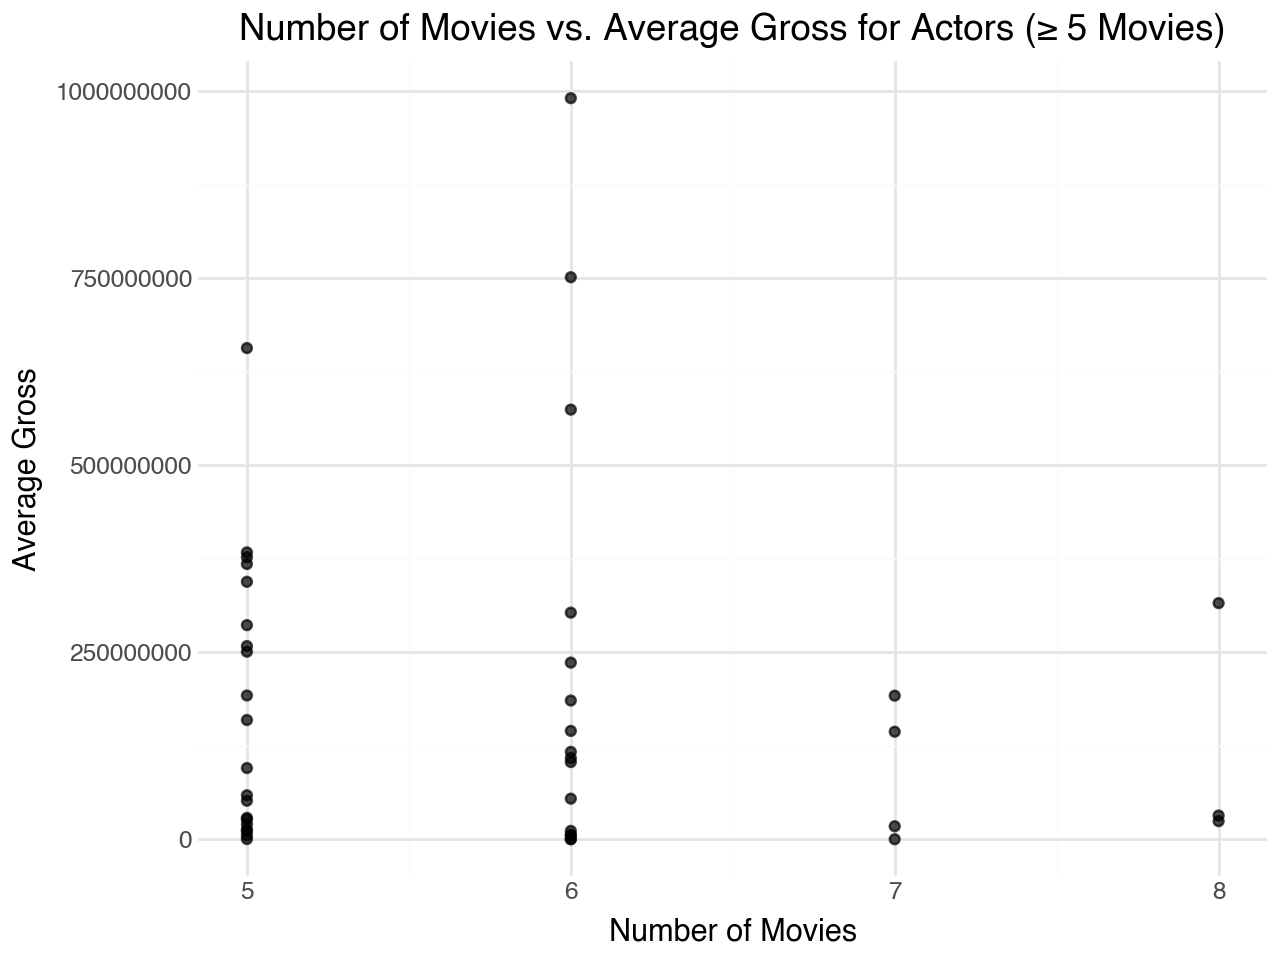

In [138]:

actor_stats = movies.groupby('actor_1_name').agg(
    num_movies=('movie_title', 'count'),
    avg_gross=('gross', 'mean')
).reset_index()


actor_stats_filtered = actor_stats[actor_stats['num_movies'] >= 5]

plot = (
    ggplot(actor_stats_filtered, aes(x='num_movies', y='avg_gross')) +
    geom_point(alpha=0.7) +
    labs(
        x='Number of Movies',
        y='Average Gross',
        title='Number of Movies vs. Average Gross for Actors (≥ 5 Movies)'
    ) +
    theme_minimal()
)
plot.show()

____
# 3. p-values and Uncertainty


In [139]:
import numpy as np
import pandas as pd
from scipy import stats

#-------------------------------------------------
# Benjamini-Hochberg p-value adjustment
#-------------------------------------------------

np.random.seed(123)  # For reproducibility

# Generate a data frame with simulated campaign data

# Parameters
n_campaigns = 20
observations_per_campaign = 100

# Generate campaign IDs repeated for each observation
campaignID = np.repeat(np.arange(1, n_campaigns + 1), observations_per_campaign)

# Generate observations
# Assuming the pre and post observations are paired for each campaign in both control and treatment
preControl = np.random.normal(100, 10, n_campaigns * observations_per_campaign)
postControl = np.random.normal(100, 10, n_campaigns * observations_per_campaign)
preTreatment = np.random.normal(100, 10, n_campaigns * observations_per_campaign)
postTreatment = np.random.normal(105, 10, n_campaigns * observations_per_campaign)  # Added effect

# Combine into a dataframe
campaign_data = pd.DataFrame({
    'CampaignID': campaignID,
    'PreControl': preControl,
    'PostControl': postControl,
    'PreTreatment': preTreatment,
    'PostTreatment': postTreatment
})

print(campaign_data.head())
print(f"Shape: {campaign_data.shape}")

   CampaignID  PreControl  PostControl  PreTreatment  PostTreatment
0           1   89.143694    82.257765     95.287245     107.269067
1           1  109.973454    87.986227    110.840724      81.014464
2           1  102.829785   110.962568     96.207767     100.521420
3           1   84.937053   108.610369     96.377261     106.973844
4           1   94.213997    84.796329     93.189293     111.273651
Shape: (2000, 5)


In [140]:
# B-H procedure


# First part - calculate p-values for each campaign
results = campaign_data.groupby('CampaignID').apply(
    lambda x: pd.Series({
        'p_value': stats.ttest_ind(
            x['PostControl'] - x['PreControl'],
            x['PostTreatment'] - x['PreTreatment']
        )[1]
    })
).reset_index()

# Now apply the Benjamini-Hochberg procedure
# Sort the data by p-value
results_agg = results.sort_values('p_value').reset_index(drop=True)

# Add rank
results_agg['rank'] = range(1, len(results_agg) + 1)

# Calculate the critical values for comparison
m = len(results_agg)  # Total number of tests
Q = 0.05  # Desired False Discovery Rate (FDR) level
results_agg['BH_critical_value'] = (results_agg['rank'] / m) * Q

# Identify significant results
results_agg['significant'] = results_agg['p_value'] < results_agg['BH_critical_value']

# Find the largest rank where p-value is less than the BH critical value
significant_mask = results_agg['significant']
if significant_mask.any():
    last_significant = results_agg[significant_mask]['rank'].max()
    # All tests with rank <= last_significant are considered significant
    results_agg['significant'] = results_agg['rank'] <= last_significant

print(results_agg)

    CampaignID   p_value  rank  BH_critical_value  significant
0           15  0.000003     1             0.0025         True
1            7  0.000424     2             0.0050         True
2           13  0.001176     3             0.0075         True
3           10  0.001621     4             0.0100         True
4            5  0.002430     5             0.0125         True
5            4  0.003801     6             0.0150         True
6           20  0.004293     7             0.0175         True
7           14  0.010490     8             0.0200         True
8            2  0.012819     9             0.0225         True
9           11  0.034824    10             0.0250        False
10           6  0.061287    11             0.0275        False
11          18  0.066138    12             0.0300        False
12          12  0.176292    13             0.0325        False
13           9  0.226823    14             0.0350        False
14           3  0.232433    15             0.0375      

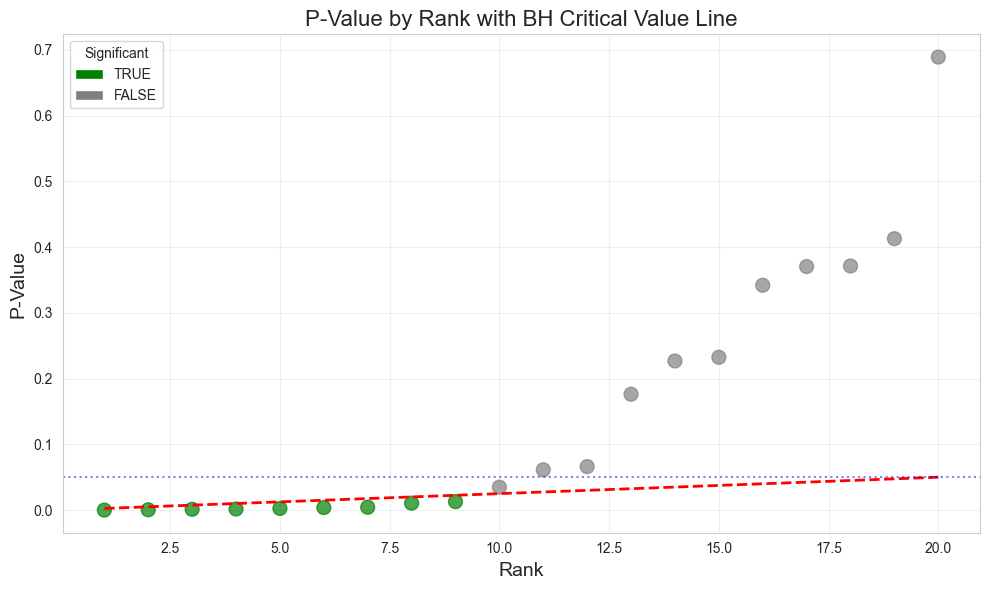


Number of significant results: 9
Campaigns with significant effects: [15, 7, 13, 10, 5, 4, 20, 14, 2]


In [141]:
from matplotlib.patches import Patch

import matplotlib.pyplot as plot

fig, ax = plot.subplots(figsize=(10, 6))

# Scatter plot: points colored by significance
ax.scatter(results_agg['rank'], results_agg['p_value'], c=colors, s=100, alpha=0.7, label='P-Values')

# BH critical value line
ax.plot(results_agg['rank'], results_agg['BH_critical_value'], 'r--', label='BH Critical Value', linewidth=2)

# Horizontal line at 0.05
ax.axhline(y=0.05, color='blue', linestyle=':', alpha=0.5, label='α = 0.05')

ax.set_xlabel('Rank', fontsize=14)
ax.set_ylabel('P-Value', fontsize=14)
ax.set_title('P-Value by Rank with BH Critical Value Line', fontsize=16)
ax.grid(True, alpha=0.3)

# Custom legend
legend_elements = [
    Patch(facecolor='green', label='TRUE'),
    Patch(facecolor='gray', label='FALSE'),
]
ax.legend(handles=legend_elements, title='Significant', loc='upper left')

plot.tight_layout()
plot.show()

print(f"\nNumber of significant results: {results_agg['significant'].sum()}")
print(f"Campaigns with significant effects: {results_agg[results_agg['significant']]['CampaignID'].tolist()}")

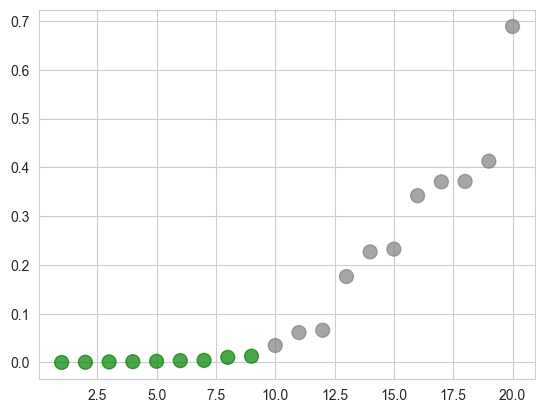

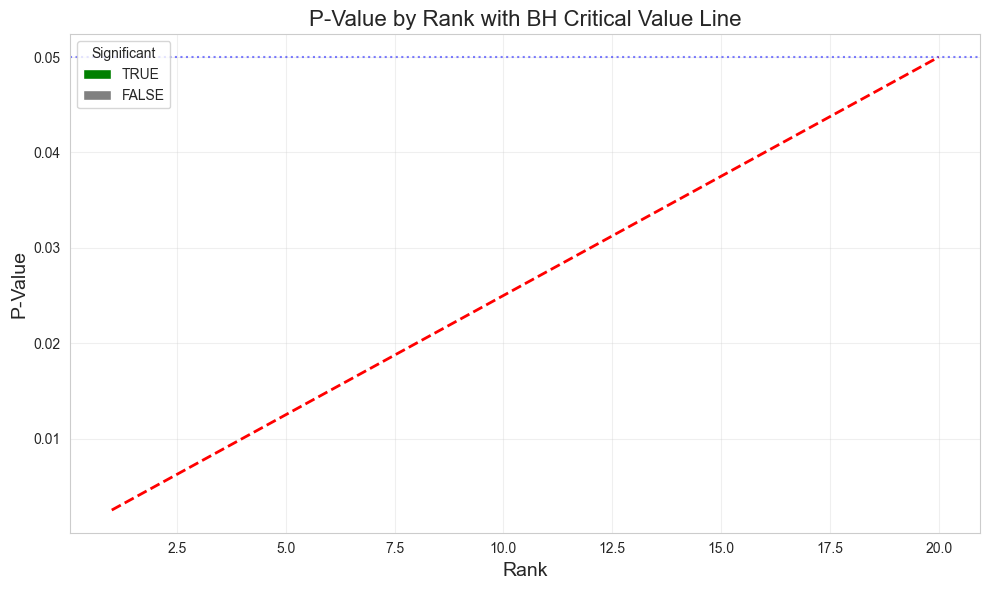


Number of significant results: 9
Campaigns with significant effects: [15, 7, 13, 10, 5, 4, 20, 14, 2]


In [142]:
from matplotlib.patches import Patch

import matplotlib.pyplot as plot

# Plot points colored by significance
colors = ['green' if sig else 'gray' for sig in results_agg['significant']]
plot.scatter(results_agg['rank'], results_agg['p_value'], c=colors, s=100, alpha=0.7)

# Create the BH plot
plot.figure(figsize=(10, 6))
# Add BH critical value line
plot.plot(results_agg['rank'], results_agg['BH_critical_value'], 
         'r--', label='BH Critical Value', linewidth=2)

# Add horizontal line at 0.05
plot.axhline(y=0.05, color='blue', linestyle=':', alpha=0.5, label='α = 0.05')

plot.xlabel('Rank', fontsize=14)
plot.ylabel('P-Value', fontsize=14)
plot.title('P-Value by Rank with BH Critical Value Line', fontsize=16)
plot.grid(True, alpha=0.3)

# Create custom legend
legend_elements = [
    Patch(facecolor='green', label='TRUE'),
    Patch(facecolor='gray', label='FALSE'),
]
plot.legend(handles=legend_elements, title='Significant', loc='upper left')

plot.tight_layout()
plot.show()

# Print summary
print(f"\nNumber of significant results: {results_agg['significant'].sum()}")
print(f"Campaigns with significant effects: {results_agg[results_agg['significant']]['CampaignID'].tolist()}")